# Rain in Australia - Classification Task


Context
Predict next-day rain by training classification models on the target variable RainTomorrow.

Content
This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

(taken from kaggle - https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)





In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather = pd.read_csv("weatherAUS.csv")
weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

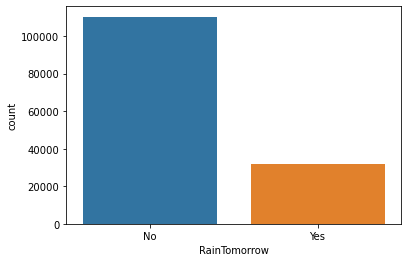

In [5]:
sns.countplot(weather.RainTomorrow)
plt.show()

In [6]:
weather.RainTomorrow.value_counts()
#Dataset is not very balanced

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [7]:
weather.Date = pd.to_datetime(weather.Date)
#Make the date a datetime object

In [8]:
weather.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [9]:
syd = weather[weather.Location == "Sydney"]
syd.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [10]:
syd["Month"] = syd.Date.dt.month


<ipython-input-10-8cff597776d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syd["Month"] = syd.Date.dt.month


In [11]:
syd.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,2
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,2
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,2
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,2
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,2


In [12]:
temp_by_month = syd.groupby(["Month"])['MaxTemp', 'MinTemp'].mean().reset_index()
temp_by_month

<ipython-input-12-8833cb7439b0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp_by_month = syd.groupby(["Month"])['MaxTemp', 'MinTemp'].mean().reset_index()


,Month,MaxTemp,MinTemp
0,1,27.517204,20.316487
1,2,26.880784,20.186275
2,3,25.881290,18.857419
3,4,23.504444,15.387732
4,5,21.153548,12.110645
5,6,18.371864,10.501017
6,7,17.991398,8.986738
7,8,19.341935,9.729749
8,9,21.992963,12.620074
9,10,23.468459,14.778853


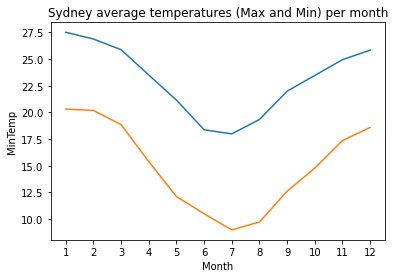

In [13]:
sns.lineplot(data = temp_by_month, x = "Month", y= "MaxTemp")
sns.lineplot(data = temp_by_month, x = "Month", y= "MinTemp")
plt.xticks(temp_by_month.Month)
plt.title("Sydney average temperatures (Max and Min) per month")
plt.show()


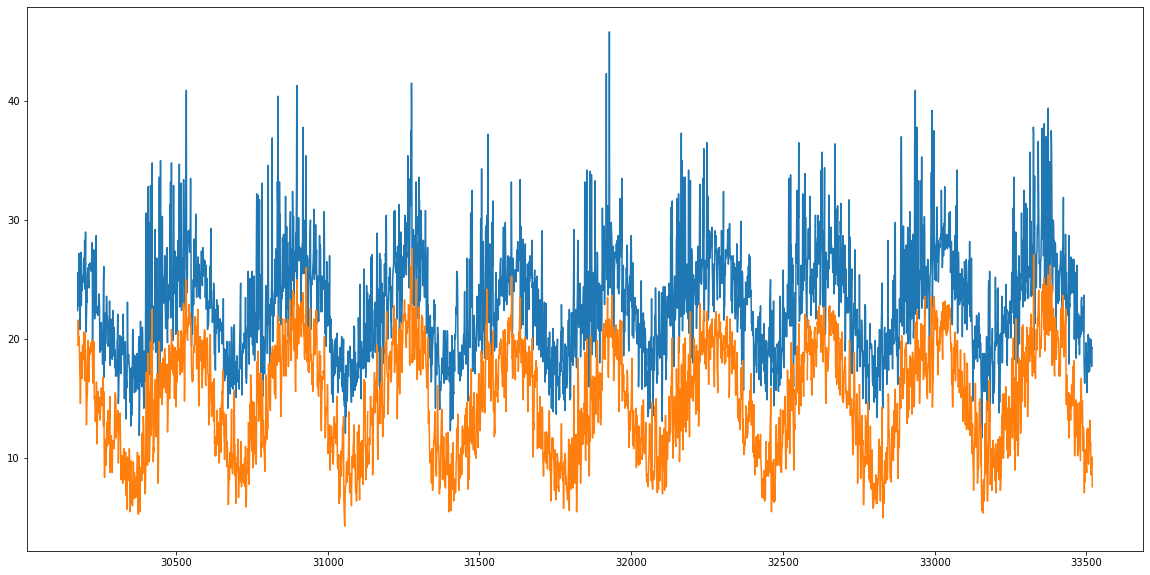

In [14]:
from matplotlib.pyplot import figure

figure(figsize = (20,10))
plt.plot(syd.MaxTemp)
plt.plot(syd.MinTemp)
#plt.xticks(syd.Date.unique())
plt.show()

## Data cleaning

In [15]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [16]:
weather["month"] = weather.Date.dt.month
weather["day"] = weather.Date.dt.day
weather["year"] = weather.Date.dt.year

In [17]:
pd.set_option('display.max_columns', None)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,day,year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12,1,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12,2,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12,3,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12,4,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12,5,2008


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


### Again but with missing value inputation

In [19]:
df = weather.copy()
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,day,year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12,1,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12,2,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12,3,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12,4,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12,5,2008


In [20]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
month                     int64
day                       int64
year                      int64
dtype: object

In [21]:
cat = df.select_dtypes(include = ["object"])
num = df.select_dtypes(include = ["float64", "int64"])

In [22]:
cat.tail()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
145455,Uluru,E,SE,ENE,No,No
145456,Uluru,NNW,SE,N,No,No
145457,Uluru,N,SE,WNW,No,No
145458,Uluru,SE,SSE,N,No,No
145459,Uluru,NaN,ESE,ESE,No,NaN


### Missing value inputation for categorical variables

In [23]:
#Replace each value in WindGustDir with the most common value in the Location Column
import warnings
warnings.filterwarnings("ignore")


cat.loc[cat['WindGustDir'].isna(), 'WindGustDir'] = cat.groupby(['Location'])['WindGustDir'].transform(lambda x: x.mode()[0] if any(x.mode()) else 'ALL_NAN')

In [24]:
cat.tail()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
145455,Uluru,E,SE,ENE,No,No
145456,Uluru,NNW,SE,N,No,No
145457,Uluru,N,SE,WNW,No,No
145458,Uluru,SE,SSE,N,No,No
145459,Uluru,E,ESE,ESE,No,NaN


In [25]:
cat.isna().sum()

Location            0
WindGustDir         0
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [26]:
cat.loc[cat['WindDir9am'].isna(), 'WindDir9am'] = cat.groupby(['Location'])['WindDir9am'].transform(lambda x: x.mode()[0] if any(x.mode()) else 'ALL_NAN')

cat.loc[cat['WindDir3pm'].isna(), 'WindDir3pm'] = cat.groupby(['Location'])['WindDir3pm'].transform(lambda x: x.mode()[0] if any(x.mode()) else 'ALL_NAN')

cat.loc[cat['WindDir3pm'].isna(), 'WindDir3pm'] = cat.groupby(['Location'])['WindDir3pm'].transform(lambda x: x.mode()[0] if any(x.mode()) else 'ALL_NAN')

cat.loc[cat['RainToday'].isna(), 'RainToday'] = cat.groupby(['Location'])['RainToday'].transform(lambda x: x.mode()[0] if any(x.mode()) else 'ALL_NAN')



In [27]:
cat.isna().sum()
#Notice missing values in DEPENDENT variable, these will need to be dropped later on

Location           0
WindGustDir        0
WindDir9am         0
WindDir3pm         0
RainToday          0
RainTomorrow    3267
dtype: int64

### Missing value imputation for numerical variables

In [28]:
num.isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
month                0
day                  0
year                 0
dtype: int64

In [29]:
#Add the location column back into the numerical values dataframe for imputation reasons
num["Location"] = cat["Location"]
num.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,month,day,year,Location
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,12,1,2008,Albury
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,12,2,2008,Albury
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,12,3,2008,Albury
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,12,4,2008,Albury
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,12,5,2008,Albury


In [30]:
cols_to_impute = [col_name for col_name in num.columns  if num[col_name].isna().sum() != 0] 
#Ignore all columns that have no missing values
cols_to_impute

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [31]:
for col in cols_to_impute:
    num.loc[num[col].isna(), col] = num.groupby(['Location'])[col].transform(lambda x: x.median())
    #For each missing value in each column fill it with the median value for all data in the same location

In [32]:
#FIll remaining na values with the median of the whole column as it means that whole locations have missing values
num.fillna(num.median(), inplace = True)

In [33]:
num.drop(["Location"], axis = 1, inplace = True)
#Drop it as we will have a duplicate otherwise when combining the two datasets

In [34]:
num.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,month,day,year
0,13.4,22.9,0.6,4.4,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,12,1,2008
1,7.4,25.1,0.0,4.4,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,8.0,7.0,17.2,24.3,12,2,2008
2,12.9,25.7,0.0,4.4,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,12,3,2008
3,9.2,28.0,0.0,4.4,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,12,4,2008
4,17.5,32.3,1.0,4.4,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,12,5,2008


In [35]:
df = pd.concat([cat,num], axis = 1)
#Recombine the categorical data and numerical data into one dataframe, with imputations done
df.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,month,day,year
0,Albury,W,W,WNW,No,No,13.4,22.9,0.6,4.4,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,12,1,2008
1,Albury,WNW,NNW,WSW,No,No,7.4,25.1,0.0,4.4,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,8.0,7.0,17.2,24.3,12,2,2008
2,Albury,WSW,W,WSW,No,No,12.9,25.7,0.0,4.4,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,12,3,2008
3,Albury,NE,SE,E,No,No,9.2,28.0,0.0,4.4,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,12,4,2008
4,Albury,W,ENE,NW,No,No,17.5,32.3,1.0,4.4,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,12,5,2008


In [36]:
df.dropna(inplace = True)
#drop the only remaining na rows which correlate to the missing values in the dependent variable
df.isna().sum()

Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
RainTomorrow     0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
month            0
day              0
year             0
dtype: int64

In [37]:
df.info()
#Confirm there are no missing values anymore

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   WindGustDir    142193 non-null  object 
 2   WindDir9am     142193 non-null  object 
 3   WindDir3pm     142193 non-null  object 
 4   RainToday      142193 non-null  object 
 5   RainTomorrow   142193 non-null  object 
 6   MinTemp        142193 non-null  float64
 7   MaxTemp        142193 non-null  float64
 8   Rainfall       142193 non-null  float64
 9   Evaporation    142193 non-null  float64
 10  Sunshine       142193 non-null  float64
 11  WindGustSpeed  142193 non-null  float64
 12  WindSpeed9am   142193 non-null  float64
 13  WindSpeed3pm   142193 non-null  float64
 14  Humidity9am    142193 non-null  float64
 15  Humidity3pm    142193 non-null  float64
 16  Pressure9am    142193 non-null  float64
 17  Pressure3pm    142193 non-nul

In [38]:
df["RainToday"].replace({"Yes":1, "No" :0}, inplace = True)
df["RainTomorrow"].replace({"Yes":1, "No" :0}, inplace = True)

#Change the yes/no columns to 1/0 instead for modelling purposes.

In [39]:
df.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,month,day,year
0,Albury,W,W,WNW,0,0,13.4,22.9,0.6,4.4,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,12,1,2008
1,Albury,WNW,NNW,WSW,0,0,7.4,25.1,0.0,4.4,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,8.0,7.0,17.2,24.3,12,2,2008
2,Albury,WSW,W,WSW,0,0,12.9,25.7,0.0,4.4,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,12,3,2008
3,Albury,NE,SE,E,0,0,9.2,28.0,0.0,4.4,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,12,4,2008
4,Albury,W,ENE,NW,0,0,17.5,32.3,1.0,4.4,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,12,5,2008


In [40]:
#One Hot Enconding for all the remaining categorical variables

windgustdir = df[["WindGustDir"]]
windgustdir = pd.get_dummies(windgustdir, drop_first = True)

windgust9am = df[["WindDir9am"]]
windgust9am = pd.get_dummies(windgust9am, drop_first = True)

windgust3pm = df[["WindDir3pm"]]
windgust3pm = pd.get_dummies(windgust3pm, drop_first = True)

location = df[["Location"]]
location = pd.get_dummies(location, drop_first = True)

In [41]:
data = pd.concat([df, windgustdir, windgust9am, windgust3pm, location], axis = 1)
data.drop(["Location", "WindGustDir", "WindDir9am", "WindDir3pm"], axis = 1, inplace = True)
data.head()

#Combine the dataset with One Hot Encoding done, drop the initial columns that are now redundant

,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,month,day,year,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,0,0,13.4,22.9,0.6,4.4,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,12,1,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,7.4,25.1,0.0,4.4,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,8.0,7.0,17.2,24.3,12,2,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,12.9,25.7,0.0,4.4,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,12,3,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,9.2,28.0,0.0,4.4,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,12,4,2008,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,17.5,32.3,1.0,4.4,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,12,5,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Commence modelling now that the data is appropriately cleaned

In [42]:
#Separate the data in the X and y for modelling

X = data.drop(["RainTomorrow"], axis = 1)
y = np.array(data[["RainTomorrow"]]).ravel()
#ravel() makes the shape of the y suitable for modelling

print(X.shape, y.shape)

(142193, 114) (142193,)


In [43]:
#Import the necessary libraries
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import precision_score,recall_score, accuracy_score,confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import xgboost as xgb

In [44]:
#Separate the data into a training and test set
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(99535, 114) (42658, 114) (99535,) (42658,)


In [45]:
#Use a robust scaler as the data is very varied and follows different distributions

robust_scaler = RobustScaler()

X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.transform(X_test)


### Logistic Regression

In [46]:
logistic_model = LogisticRegression(n_jobs = -1).fit(X_train, y_train)


In [47]:
print(f"The Accuracy by the simple logistic regression model is {logistic_model.score(X_test,y_test)}")

The Accuracy by the simple logistic regression model is 0.8474846453185804


In [48]:
logistic_params = {
    "penalty" : ["l1", "l2", "elasticnet"],
    "C" : [0.5,1,2]
}

In [49]:
%%time

logistic_cv = GridSearchCV(logistic_model, logistic_params).fit(X_train,y_train)

Wall time: 4min 26s


In [50]:
logistic_cv.best_params_

{'C': 0.5, 'penalty': 'l2'}

In [51]:
logistic_preds = logistic_cv.predict(X_test)
print(f"The Accuracy for the best logistic model is {logistic_cv.score(X_test,y_test)*100}%.")


print("Precision = {}".format(precision_score(y_test, logistic_preds)))
print("Recall = {}".format(recall_score(y_test, logistic_preds)))
print("Accuracy = {}".format(accuracy_score(y_test, logistic_preds)))


The Accuracy for the best logistic model is 84.7179895916358%.
Precision = 0.7228826151560178
Recall = 0.5110830969639668
Accuracy = 0.847179895916358


### K-nearest Neighbours

In [52]:
knn_model = KNeighborsClassifier(n_jobs = -1).fit(X_train,y_train)

In [53]:
print(f"The Accuray for the generic K-nearest neighbour model is {knn_model.score(X_test,y_test)}.")

The Accuray for the generic K-nearest neighbour model is 0.8271602044165222.


In [54]:
knn_params = {
    "n_neighbors" : range(5,20,4),
    "weights":["uniform", "distance"],
    "p" : range(1,5,1)
}

In [58]:
%%time 
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv = 5).fit(X_train,y_train)

Wall time: 15h 26min 41s


In [62]:
knn_cv.best_params_

{'n_neighbors': 17, 'p': 1, 'weights': 'distance'}

In [63]:
print(f"The Accuray for the generic K-nearest neighbour model is {knn_cv.score(X_test,y_test)}.")

The Accuray for the generic K-nearest neighbour model is 0.8398190257396033.


[[31576  1563]
 [ 5270  4249]]


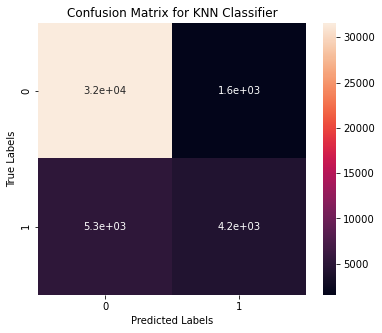

In [64]:
knn_preds = knn_cv.predict(X_test)
knn_cm = confusion_matrix(y_test,knn_preds)
print(knn_cm)

#PLot Cm
figure(figsize = (6,5))
ax = plt.subplot()
sns.heatmap(knn_cm, ax=ax, annot = True)
ax.set_ylabel("True Labels")
ax.set_xlabel("Predicted Labels")
ax.set_title("Confusion Matrix for KNN Classifier")
plt.show()

In [65]:
print("Precision = {}".format(precision_score(y_test, knn_preds)))
print("Recall = {}".format(recall_score(y_test, knn_preds)))
print("Accuracy = {}".format(accuracy_score(y_test, knn_preds)))

Precision = 0.7310736407432897
Recall = 0.4463704170606156
Accuracy = 0.8398190257396033


The optimized K-Nearest Neighbors model has an accuracy of 84%

### Random Forest Model

In [73]:
random_forest = RandomForestClassifier(n_jobs = -1).fit(X_train,y_train)

In [65]:
print(f'The accuracy of the generic Random Forest classifier on the training set is {random_forest.score(X_train,y_train)}.')

print(f'The accuracy of the generic Random Forest classifier on the testing set is {random_forest.score(X_test,y_test)}.')

#This accuracy score suggests overfitting

The accuracy of the generic Random Forest classifier on the training set is 0.9999899532827649.
The accuracy of the generic Random Forest classifier on the testing set is 0.8579867785643959.


In [74]:
rf_preds = random_forest.predict(X_test)

print("Precision = {}".format(precision_score(y_test, rf_preds)))
print("Recall = {}".format(recall_score(y_test, rf_preds)))
print("Accuracy = {}".format(accuracy_score(y_test, rf_preds)))

Precision = 0.7750362844702468
Recall = 0.5048849669082887
Accuracy = 0.8568146654789254


[[31793  1346]
 [ 4712  4807]]


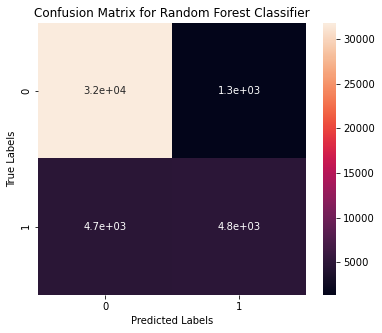

In [77]:
rf_cm = confusion_matrix(y_test,rf_preds)
print(rf_cm)

#PLot Cm
figure(figsize = (6,5))
ax = plt.subplot()
sns.heatmap(rf_cm, ax=ax, annot = True)
ax.set_ylabel("True Labels")
ax.set_xlabel("Predicted Labels")
ax.set_title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [60]:
rf_params = {
    "n_estimators": range(1,1000,200),
    "max_depth" : range(1,100,10),
    "criterion" : ["gini","entropy"],
    "max_features" : ["auto","sqrt","log2"]
}

In [61]:
#%%time

#rf_cv = GridSearchCV(random_forest, rf_params, cv = 5).fit(X_train,y_train)


KeyboardInterrupt: 

### XGBoost Model

In [279]:
%%time

xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

Wall time: 6.11 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [313]:
xgb_predictions = xgb.predict(X_test)
print(xgb.score(X_train,y_train))

print(xgb.score(X_test,y_test))


0.8893454563721304
0.8590651226030287


In [314]:
print("Precision = {}".format(precision_score(y_test, xgb_predictions, average='macro')))
print("Recall = {}".format(recall_score(y_test, xgb_predictions, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, xgb_predictions)))

Precision = 0.8149036676069938
Recall = 0.7504019058276471
Accuracy = 0.8590651226030287


In [315]:
clf = xgb.XGBClassifier()

parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=-1,
                    scoring="neg_log_loss",
                    cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [316]:
grid.best_params_

{'colsample_bytree': 0.7,
 'eta': 0.1,
 'gamma': 0.2,
 'max_depth': 15,
 'min_child_weight': 7}

In [67]:
xgb_best = xgb.XGBClassifier(eta = 0.1, colsample_by_tree = 0.7, gamma = 0.2, max_depth = 15, min_child_weight = 7)

In [68]:
xgb_best.fit(X_train,y_train)

[11:03:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_by_tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_by_tree=0.7,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              eta=0.1, gamma=0.2, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=15, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [69]:
xgb_best.score(X_test,y_test)

0.8623001547189273

In [70]:
xgb_preds = xgb_best.predict(X_test)

[[31419  1720]
 [ 4154  5365]]


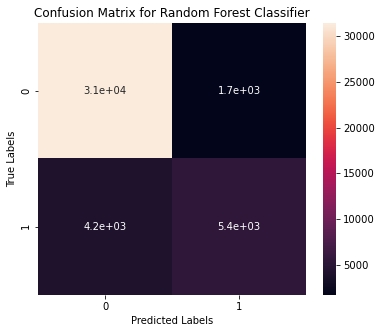

In [71]:
xgb_cm = confusion_matrix(y_test,xgb_preds)
print(xgb_cm)

#PLot Cm
figure(figsize = (6,5))
ax = plt.subplot()
sns.heatmap(xgb_cm, ax=ax, annot = True)
ax.set_ylabel("True Labels")
ax.set_xlabel("Predicted Labels")
ax.set_title("Confusion Matrix for Random Forest Classifier")
plt.show()

### Neural Network Model

In [76]:
import tensorflow as tf
from tensorflow import keras
print(f"Tensorflow Version: {tf.version.VERSION}")

Tensorflow Version: 2.3.1


In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers


In [92]:
#Use this to run using GPU
tf.config.experimental.list_physical_devices("GPU")

[]

In [78]:
def build_nn_model(metric = "accuracy"):
    
    model = Sequential()
    
    model.add(Dense(32, input_shape = (X_train.shape[1],)))
    model.add(Dense(64, Activation("relu")))
    model.add(Dense(128, Activation("relu")))
    model.add(Dense(128, Activation("relu")))
    model.add(Dense(1))
    
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
                 optimizer = optimizer,
                 metrics = [metric])
    
    return model

model1 = build_nn_model(metric = "binary_accuracy")
model2 = build_nn_model(metric = "binary_accuracy")
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                3680      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 30,753
Trainable params: 30,753
Non-trainable params: 0
_________________________________________________________________


In [79]:
EPOCHS = 100
batch_size = 16


history = model1.fit(
    X_train,
    y_train,
    batch_size = batch_size, 
    epochs = EPOCHS,
    verbose = 1,
    validation_data = (X_test,y_test))

Epoch 1/100
6221/6221 [==============================] - 4s 651us/step - loss: 0.3841 - binary_accuracy: 0.8239 - val_loss: 0.3588 - val_binary_accuracy: 0.8405
Epoch 2/100
6221/6221 [==============================] - 4s 627us/step - loss: 0.3577 - binary_accuracy: 0.8380 - val_loss: 0.3587 - val_binary_accuracy: 0.8461
Epoch 3/100
6221/6221 [==============================] - 4s 628us/step - loss: 0.3518 - binary_accuracy: 0.8406 - val_loss: 0.3500 - val_binary_accuracy: 0.8472
Epoch 4/100
6221/6221 [==============================] - 4s 620us/step - loss: 0.3472 - binary_accuracy: 0.8436 - val_loss: 0.3461 - val_binary_accuracy: 0.8476
Epoch 5/100
6221/6221 [==============================] - 4s 631us/step - loss: 0.3435 - binary_accuracy: 0.8452 - val_loss: 0.3460 - val_binary_accuracy: 0.8488
Epoch 6/100
6221/6221 [==============================] - 4s 617us/step - loss: 0.3406 - binary_accuracy: 0.8462 - val_loss: 0.3414 - val_binary_accuracy: 0.8419
Epoch 7/100
6221/6221 [===========

6221/6221 [==============================] - 4s 623us/step - loss: 0.2874 - binary_accuracy: 0.8693 - val_loss: 0.3325 - val_binary_accuracy: 0.8550
Epoch 52/100
6221/6221 [==============================] - 4s 634us/step - loss: 0.2862 - binary_accuracy: 0.8686 - val_loss: 0.3351 - val_binary_accuracy: 0.8525
Epoch 53/100
6221/6221 [==============================] - 4s 618us/step - loss: 0.2851 - binary_accuracy: 0.8687 - val_loss: 0.3434 - val_binary_accuracy: 0.8561
Epoch 54/100
6221/6221 [==============================] - 4s 618us/step - loss: 0.2843 - binary_accuracy: 0.8697 - val_loss: 0.3471 - val_binary_accuracy: 0.8584
Epoch 55/100
6221/6221 [==============================] - 4s 616us/step - loss: 0.2837 - binary_accuracy: 0.8701 - val_loss: 0.3415 - val_binary_accuracy: 0.8575
Epoch 56/100
6221/6221 [==============================] - 4s 614us/step - loss: 0.2821 - binary_accuracy: 0.8708 - val_loss: 0.3458 - val_binary_accuracy: 0.8566
Epoch 57/100
6221/6221 [=================

In [81]:
score = model1.evaluate(X_test, y_test)
score


1334/1334 [==============================] - 1s 396us/step - loss: 0.3977 - binary_accuracy: 0.8446


[0.39765387773513794, 0.8445543646812439]

In [131]:
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.head()

,loss,binary_accuracy,val_loss,val_binary_accuracy,epoch
0,0.387972,0.821982,0.365273,0.842773,0
1,0.357950,0.837092,0.353317,0.834310,1
2,0.350524,0.842387,0.347907,0.840241,2
3,0.345900,0.843854,0.343201,0.848329,3
4,0.342661,0.845954,0.344529,0.850415,4


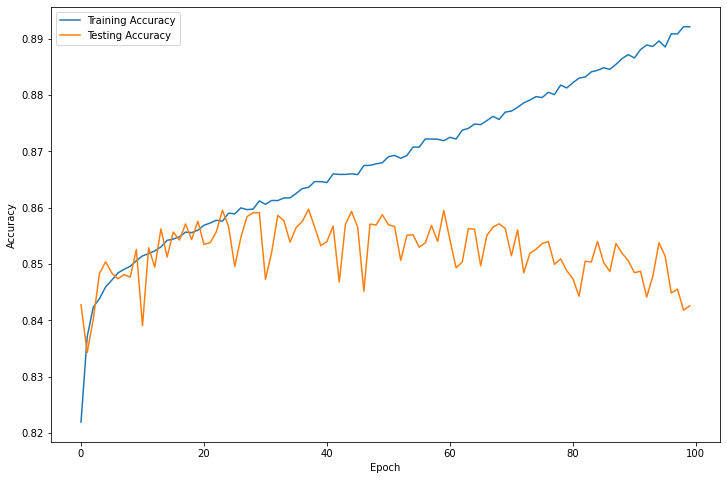

In [134]:
figure(figsize = (12,8))
plt.plot(history.history["binary_accuracy"])
plt.plot(history.history["val_binary_accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training Accuracy","Testing Accuracy"])
plt.show()

In [80]:
nn_preds = model1.predict(X_test)
nn_preds = (nn_preds > 0.5)
nn_preds
print("Precision = {}".format(precision_score(y_test, nn_preds)))
print("Recall = {}".format(recall_score(y_test, nn_preds)))
print("Accuracy = {}".format(accuracy_score(y_test, nn_preds)))

Precision = 0.689203354297694
Recall = 0.5525790524214729
Accuracy = 0.8445543626049041


[[30118  3021]
 [ 3702  5817]]


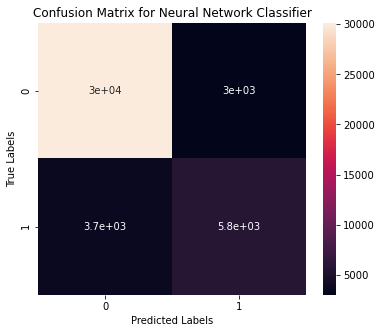

In [128]:
nn_cm = confusion_matrix(y_test,nn_preds)
print(nn_cm)

#PLot Cm
figure(figsize = (6,5))
ax = plt.subplot()
sns.heatmap(nn_cm, ax=ax, annot = True)
ax.set_ylabel("True Labels")
ax.set_xlabel("Predicted Labels")
ax.set_title("Confusion Matrix for Neural Network Classifier")
plt.show()

In [119]:
#EPOCHS = 30
#batch_size = 16


##history2 = model2.fit(
 #   X_train,
 #   y_train,
 #   batch_size = batch_size, 
 #   epochs = EPOCHS,
 #   verbose = 1,
 #   validation_data = (X_test,y_test))

In [120]:
#figure(figsize = (12,8))
#plt.plot(history2.history["binary_accuracy"])
#plt.plot(history2.history["val_binary_accuracy"])
#plt.ylabel("Accuracy")
#plt.xlabel("Epoch")
#plt.legend(["Training Accuracy","Testing Accuracy"])
#plt.show()

## Cat Boost

In [123]:
import catboost
from catboost import CatBoostClassifier

In [131]:
model = CatBoostClassifier(
    iterations=15,
    learning_rate=0.1,
    # loss_function='CrossEntropy'
)
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    verbose=False
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

Model is fitted: True
Model params:
{'iterations': 15, 'learning_rate': 0.1, 'custom_loss': ['Accuracy']}


In [126]:
cat_pred = model.predict(X_test)
cat_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [132]:
print("Precision = {}".format(precision_score(y_test, cat_pred)))
print("Recall = {}".format(recall_score(y_test, cat_pred)))
print("Accuracy = {}".format(accuracy_score(y_test, cat_pred)))

Precision = 0.7369180801154818
Recall = 0.42903666351507513
Accuracy = 0.8384124900370388


### Comparing the Models


In [133]:
logistic_preds
knn_preds
rf_preds
xgb_preds
nn_preds

#Logistic
log_prec = precision_score(y_test, logistic_preds)
log_rec = recall_score(y_test,logistic_preds)
log_acc = accuracy_score(y_test, logistic_preds)
log_results = ["Logistic Regression",log_prec, log_rec, log_acc]


#Knn
knn_prec = precision_score(y_test, knn_preds)
knn_rec = recall_score(y_test,knn_preds)
knn_acc = accuracy_score(y_test, knn_preds)
knn_results = ["K-Nearest Neighbours",knn_prec, knn_rec, knn_acc]

#Random Forest
rf_prec = precision_score(y_test, rf_preds)
rf_rec = recall_score(y_test,rf_preds)
rf_acc = accuracy_score(y_test, rf_preds)
rf_results = ["Random Forest",rf_prec, rf_rec, rf_acc]


#XGBoost
xgb_prec = precision_score(y_test, xgb_preds)
xgb_rec = recall_score(y_test,xgb_preds)
xgb_acc = accuracy_score(y_test, xgb_preds)
xgb_results = ["XGBoost",xgb_prec, xgb_rec, xgb_acc]

#Neural Network
nn_prec = precision_score(y_test, nn_preds)
nn_rec = recall_score(y_test,nn_preds)
nn_acc = accuracy_score(y_test, nn_preds)
nn_results = ["Neural Network",nn_prec, nn_rec, nn_acc]

#Catboody
cat_prec = precision_score(y_test, cat_pred)
cat_rec = recall_score(y_test,cat_pred)
cat_acc = accuracy_score(y_test, cat_pred)
cat_results = ["Cat Boost",cat_prec, cat_rec, cat_acc]


all_results = pd.DataFrame([log_results, knn_results, rf_results, xgb_results, nn_results,cat_results],columns = ["Model","Precision", "Recall", "Accuracy"])

all_results

,Model,Precision,Recall,Accuracy
0,Logistic Regression,0.722883,0.511083,0.847180
1,K-Nearest Neighbours,0.731074,0.446370,0.839819
2,Random Forest,0.775036,0.504885,0.856815
3,XGBoost,0.757234,0.563610,0.862300
4,Neural Network,0.689203,0.552579,0.844554
5,Cat Boost,0.736918,0.429037,0.838412


<Figure size 720x720 with 0 Axes>

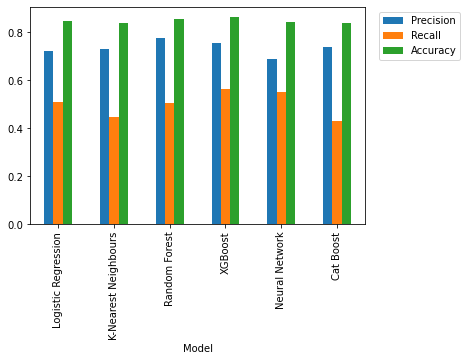

In [134]:
#sns.catplot(x = "Model", y = "Precision", data = all_results)

fig = plt.figure(figsize = (10,10))
all_results.plot(x = "Model", y = ["Precision", "Recall", "Accuracy"], kind = "bar")
plt.legend(loc = "upper right", bbox_to_anchor=(1.3, 1))
plt.show()

The graph reconfirms that XGBoost is the best model for this dataset